# Modèle d'identification des SMS Spam basé sur la régression logistique:

#### 1- set up the environment:

In [20]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
print("Set up completed .")

Set up completed .


#### 2- load the data :

In [21]:
df = pd.read_csv("./sms-spam-dataset.txt",sep="\t")

<Axes: xlabel='classe', ylabel='Count'>

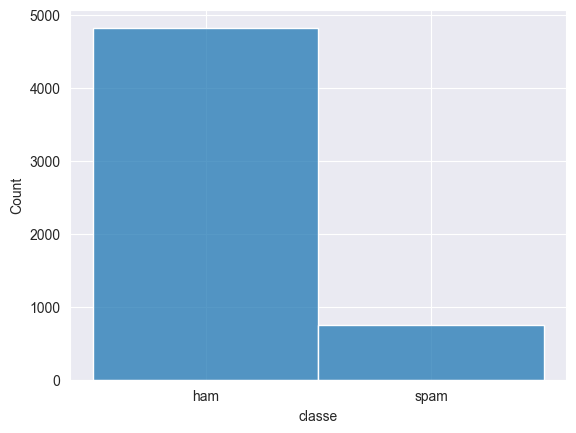

In [22]:
sns.histplot(data=df.classe)

#### 3- preprocessing the data:
to download the `en_core_web_sm` we use this command
```shell
python -m spacy download en_core_web_sm
```
for better result consider downloading  **en_core_web_lg**

In [24]:
nlp = spacy.load("en_core_web_sm")

For any machine learning project, once you've gathered the data, the first step is to process it to make useful inputs to your model.

- Remove noise: You will first want to remove noise from your data -- that is, remove words that don't tell you much about the content. These include all common words like 'I, you, are, is, etc...' that would not give us enough information on the sentiment.
- We'll also remove stock market tickers, retweet symbols, hyperlinks, and hashtags because they can not tell you a lot of information on the sentiment.
- You also want to remove all the punctuation from a tweet. The reason for doing this is because we want to treat words with or without the punctuation as the same word, instead of treating "happy", "happy?", "happy!", "happy," and "happy." as different words.
- Finally, you want to use stemming to only keep track of one variation of each word. In other words, we'll treat "motivation", "motivated", and "motivate" similarly by grouping them within the same stem of "motiv-".

In [25]:
def preprocessing(text: str) -> str:
    doc = nlp(text.lower())
    tokens = [ word.lemma_ for word in doc if not (word.is_stop or word.is_punct)]
    return ' '.join(tokens)

In [26]:
df["processed_text"] = df.message.apply(lambda text:preprocessing(text))

In [27]:
df.head()

,classe,message,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf live


In [28]:
X = df['processed_text']
y = df["classe"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [30]:
X_train.shape

(4457,)

In [31]:
X_test.shape

(1115,)

In [32]:
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)

In [33]:
X_train.shape

(4457, 6694)

#### 4- train the model:
for the classifier we use **Naive Bayes** that prove its Effectiveness in case of classification in NLP.

In [34]:
model_classifier = MultinomialNB()

In [35]:
model_classifier.fit(X_train,  y_train)

MultinomialNB()

In [36]:
X_test = cv.transform(X_test)
y_pred = model_classifier.predict(X_test)

to measure how good our model is we use F1_score that combine between recall and precision like this.
In statistical analysis of binary classification, the F-score or F-measure is a measure of a test's accuracy. It is calculated from the precision and recall of the test, where the precision is the number of true positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of true positive results divided by the number of all samples that should have been identified as positive. Precision is also known as positive predictive value, and recall is also known as sensitivity in diagnostic binary classification.

In [37]:
f1_score(y_pred,y_test,average="micro")

0.9811659192825112